# Installation

In [1]:
!pip install -U gensim

Requirement already up-to-date: gensim in d:\anconda\lib\site-packages (4.0.1)


# Import

In [48]:
# import libraries
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from nltk.stem.wordnet import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk import bigrams
from nltk import trigrams
import  collections
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN



In [49]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
data = pd.read_csv("./data/flipkart_com-ecommerce_sample_1050.csv")
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [54]:
corpus = data[['description']]
corpus.head(3)

,description
0,Key Features of Elegance Polyester Multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...
2,Key Features of Eurospa Cotton Terry Face Towe...


In [55]:
corpus.shape

(1050, 1)

#  Récupération des catégories principales

In [7]:
data['main_cat'] = data.product_category_tree.str.split(">>",expand=True,)[0]
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_cat
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[""Home Furnishing"
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[""Baby Care"
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[""Baby Care"
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[""Home Furnishing"
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[""Home Furnishing"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care"
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care"
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care"
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:

In [8]:
data['main_cat'] = data['main_cat'].str.replace(r'"', '')
data['main_cat'] = data['main_cat'].str.replace(r'[', '')
data['main_cat'] = data['main_cat'].str.replace(r']', '')

<ipython-input-8-ae0145373f22>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['main_cat'] = data['main_cat'].str.replace(r'[', '')
<ipython-input-8-ae0145373f22>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['main_cat'] = data['main_cat'].str.replace(r']', '')


In [9]:
data['main_cat'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

# Data preprocessing

Regardons ensemble la taille (nombre de mots) de corpus avant la lemmatisation :

In [10]:
data['description'].str.split().str.len().sum()

80013

In [11]:

stop_words = set(stopwords.words("english"))

#construct a new list to store the cleaned text
clean_desc = []
for w in range(len(data.description)):
    desc = data['description'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove special characters and digits
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    split_text = desc.split()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words and len(word) >2] 
    split_text = " ".join(split_text)
    clean_desc.append(split_text)

In [12]:
clean_desc

['key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interior curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model duster color multicolor dimension length box number content sale package

In [13]:
lenght = 0
for item in clean_desc:
    lenght = lenght+ len(item.split())

print(lenght)

53468


53 468 est le nombre de mots après le preprocessing de corpus.

# Features extraction

## TF-IDF

In [14]:
tfv = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,1))
#transform
vec_tfidf = tfv.fit_transform(clean_desc)
#returns a list of words.
words = tfv.get_feature_names()

## Bag of words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
bow = vectorizer.fit_transform(clean_desc)

In [16]:
bow.shape

(1050, 4497)

## Embedding word2vec

In [17]:
model_word2vec = gensim.models.Word2Vec(clean_desc, min_count = 1)

In [18]:
model_word2vec

In [19]:
# # model_word2vec[model_word2vec.wv.index_to_key]

# model_word2vec += model_word2vec.wv[word.reshape((1, size))]

# Clusterization

In [20]:
kmeans = KMeans(n_clusters = 7, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200)
def cluster_kmeans(vect):
    #setup kmeans clustering
    #fit the data 
    kmeans.fit(vect)
    #this loop transforms the numbers back into words
    common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

Nous allons matinant Clusterer les produits en comparants les différents methodes d'extractions de features

## TF-IDF 

In [21]:
cluster_kmeans(vec_tfidf)

D:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : com, flipkart, genuine, shipping, cash, delivery, free, buy, product, guarantee
1 : mug, pack, warranty, material, color, box, inch, design, coffee, feature
2 : watch, analog, men, discount, india, great, woman, sonata, com, online
3 : baby, detail, girl, fabric, dress, cotton, sleeve, neck, boy, shirt
4 : rockmantra, mug, ceramic, crafting, thrilling, porcelain, permanent, ensuring, start, stay
5 : abstract, blanket, single, com, flipkart, double, buy, genuine, shipping, cash
6 : best, showpiece, online, guarantee, replacement, day, price, cash, genuine, shipping


In [22]:
data['cluster_tfidf'] = kmeans.labels_

## Bag of Word

In [23]:
cluster_kmeans(bow)

D:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : battery, quallity, large, production, laptop, mafatlal, replicate, highest, cell, sized
1 : production, freedom, buy, shirt, cash, delivery, geol, day, flippd, com
2 : mukut, coffee, bring, perfected, design, given, known, likewise, surface, hollow
3 : mukut, coffee, ceramic, onle, team, perfected, mathematics, prior, giftbags, lovelly
4 : featuring, color, uberlyfe, box, include, package, modem, spectrum, mathematics, packaged
5 : baby, detail, girlie, fabulous, cotton, dried, boy, sleeved, neckerchew, spectrum
6 : adapter, wash, replicate, via, vajrasattva, smelled, powered, large, charger, production


In [24]:
data['cluster_bow'] = kmeans.labels_

## Embedding word2vec

In [25]:
# idx = kmeans.fit_predict(model_word2vec);

In [26]:
# X = model_word2vec[model_word2vec.vocab]

# N-Gram

In [27]:
# generate unigrams bigrams trigrams

unigram=[]
bigram=[]
trigram=[]
tokenized_text=[]

for sentence in clean_desc:
    unigram.extend(unigram)
    bigram.extend(bigrams(sentence.split(' ')))
    trigram.extend(trigrams(sentence.split(' ')))

In [28]:
bigramFreq = collections.Counter(bigram)
bigramFreq

Counter({('key', 'feature'): 207,
         ('feature', 'elegance'): 1,
         ('elegance', 'polyester'): 3,
         ('polyester', 'multicolor'): 4,
         ('multicolor', 'abstract'): 3,
         ('abstract', 'eyelet'): 4,
         ('eyelet', 'door'): 14,
         ('door', 'curtain'): 26,
         ('curtain', 'floral'): 1,
         ('floral', 'curtain'): 1,
         ('curtain', 'elegance'): 1,
         ('curtain', 'height'): 23,
         ('height', 'pack'): 12,
         ('pack', 'price'): 38,
         ('price', 'curtain'): 1,
         ('curtain', 'enhances'): 1,
         ('enhances', 'look'): 1,
         ('look', 'interior'): 1,
         ('interior', 'curtain'): 1,
         ('curtain', 'made'): 1,
         ('made', 'high'): 35,
         ('high', 'quality'): 71,
         ('quality', 'polyester'): 3,
         ('polyester', 'fabric'): 1,
         ('fabric', 'feature'): 1,
         ('feature', 'eyelet'): 1,
         ('eyelet', 'style'): 3,
         ('style', 'stitch'): 1,
         ('st

In [29]:
trigramFreq = collections.Counter(trigram)
trigramFreq

Counter({('key', 'feature', 'elegance'): 1,
         ('feature', 'elegance', 'polyester'): 1,
         ('elegance', 'polyester', 'multicolor'): 3,
         ('polyester', 'multicolor', 'abstract'): 3,
         ('multicolor', 'abstract', 'eyelet'): 3,
         ('abstract', 'eyelet', 'door'): 3,
         ('eyelet', 'door', 'curtain'): 14,
         ('door', 'curtain', 'floral'): 1,
         ('curtain', 'floral', 'curtain'): 1,
         ('floral', 'curtain', 'elegance'): 1,
         ('curtain', 'elegance', 'polyester'): 1,
         ('door', 'curtain', 'height'): 17,
         ('curtain', 'height', 'pack'): 12,
         ('height', 'pack', 'price'): 3,
         ('pack', 'price', 'curtain'): 1,
         ('price', 'curtain', 'enhances'): 1,
         ('curtain', 'enhances', 'look'): 1,
         ('enhances', 'look', 'interior'): 1,
         ('look', 'interior', 'curtain'): 1,
         ('interior', 'curtain', 'made'): 1,
         ('curtain', 'made', 'high'): 1,
         ('made', 'high', 'quality'):

# Confusion matrix

In [30]:
data = data[['main_cat','cluster_tfidf','cluster_bow']]

In [31]:
data.sample(3)

,main_cat,cluster_tfidf,cluster_bow
55,Computers,1,4
1042,Baby Care,6,1
284,Home Decor & Festive Needs,1,4


In [45]:
def create_confiuson_matrix(data, features_extrater):
    
    #Keep only the cluster of the required extrater
#     tmp_data = data[['main_cat',]]
    tmp_data = data.loc[:, 'main_cat':features_extrater]
    
    #Handle the categorical features
    dummy = pd.get_dummies(tmp_data['main_cat'])
    
    tmp_data = pd.concat([tmp_data,dummy],axis= 1)
    
    tmp_data.drop('main_cat',axis = 1 , inplace = True)
    
    confusion_matrix = tmp_data.groupby([features_extrater]).sum()
    return confusion_matrix

In [33]:
tfidf_confusin_matrix = create_confiuson_matrix(data,'cluster_tfidf')
tfidf_confusin_matrix

,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
cluster_tfidf,,,,,,,
0,15,80,67,0,26,3,0
1,36,49,57,73,76,78,8
2,0,0,0,0,0,0,141
3,80,0,0,0,0,0,0
4,0,0,0,0,0,21,0
5,5,0,0,0,48,0,0
6,14,21,26,77,0,48,1


In [46]:
bow_confusin_matrix = create_confiuson_matrix(data,'cluster_bow')
bow_confusin_matrix

,cluster_tfidf,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
cluster_bow,,,,,,,,
0,8,0,1,6,0,0,1,0
1,1879,51,121,104,104,100,89,144
2,11,0,0,0,0,0,11,0
3,20,0,0,0,0,0,20,0
4,216,22,28,33,46,50,29,6
5,229,77,0,0,0,0,0,0
6,7,0,0,7,0,0,0,0


# Sillohaite Score Analysis

In [35]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(bow_confusin_matrix) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

For n_clusters = 2 The average silhouette_score is : 0.7953806065591229
For n_clusters = 3 The average silhouette_score is : 0.7119394312131266
For n_clusters = 4 The average silhouette_score is : 0.5516843267648321
For n_clusters = 5 The average silhouette_score is : 0.32316592840460184
For n_clusters = 6 The average silhouette_score is : 0.20029567835747586


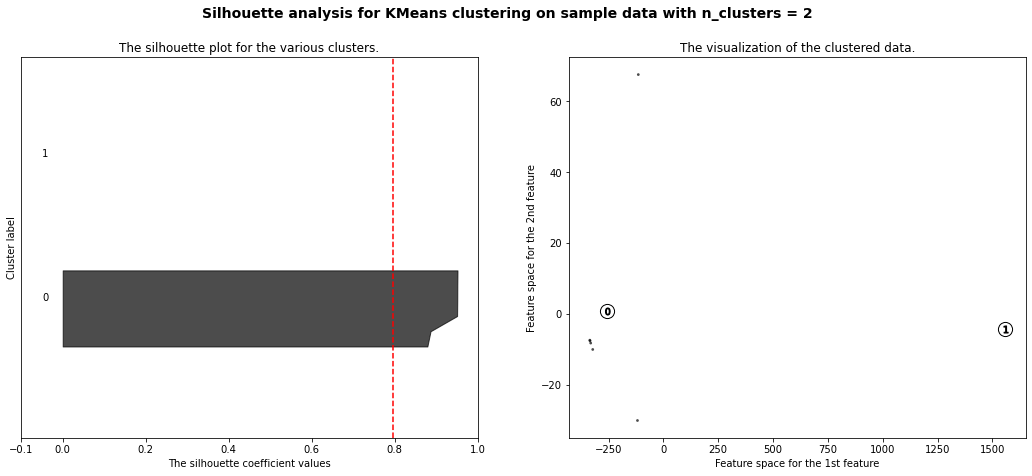

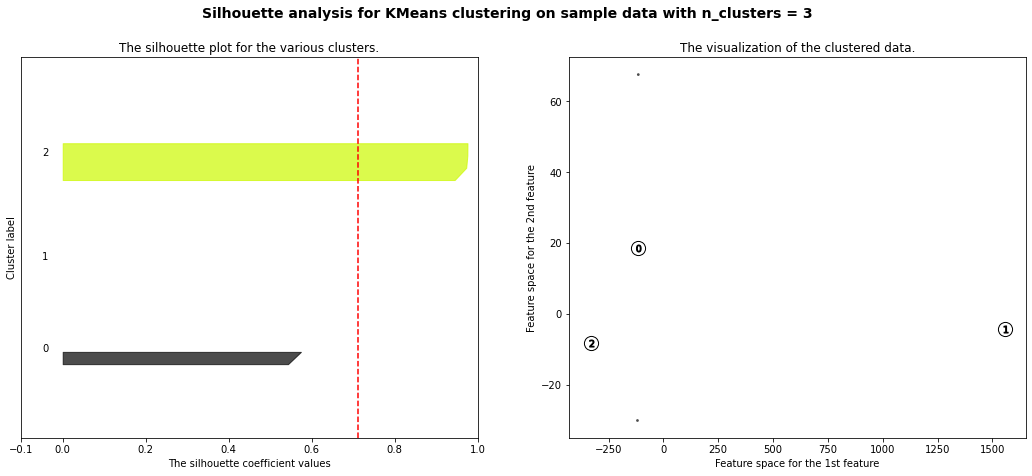

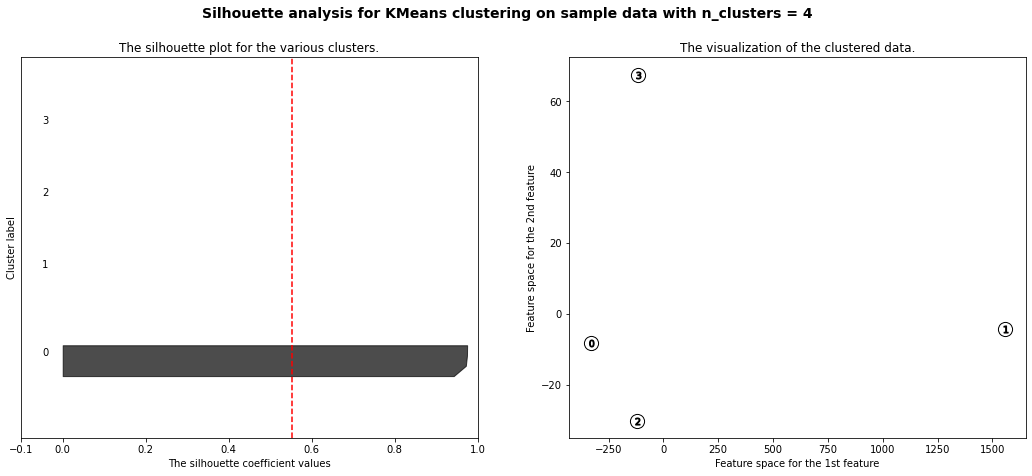

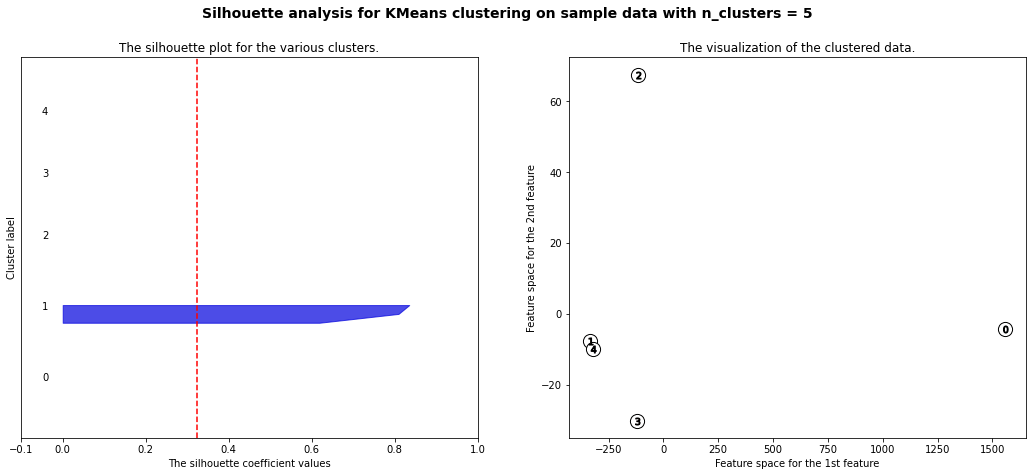

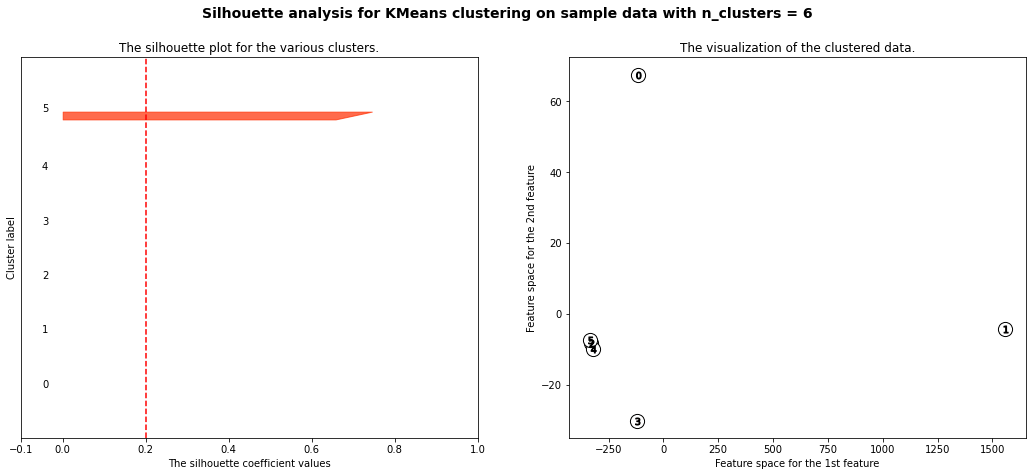

In [36]:
for n_clusters in range(2, 7):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
   
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X_principal) + (n_clusters + 1) * 6])
    
    clusterer = KMeans(n_clusters=n_clusters,max_iter=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X_principal)

    silhouette_avg = silhouette_score(X_principal, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_principal, cluster_labels)
    y_lower = 6
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 6  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_principal.iloc[:, 0], X_principal.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# T-SNE

In [37]:
X = data[['main_cat','cluster_bow']]
dummy = pd.get_dummies(X['main_cat'])
X = pd.concat([X,dummy],axis= 1)
X.drop('main_cat',axis = 1 , inplace = True)

X

,cluster_bow,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
0,4,0,0,0,0,1,0,0
1,4,1,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0
4,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1045,4,1,0,0,0,0,0,0
1046,4,1,0,0,0,0,0,0
1047,1,1,0,0,0,0,0,0
1048,1,1,0,0,0,0,0,0


In [38]:
kmeans.fit(X)

D:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(max_iter=200, n_clusters=7, n_init=17, n_jobs=-1, tol=0.01)

In [39]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [40]:
X_principal['cluster'] = kmeans.labels_
X_principal

,P1,P2,cluster
0,2.008622,-0.133033,2
1,2.105056,0.197966,1
2,2.105056,0.197966,1
3,2.008622,-0.133033,2
4,2.008622,-0.133033,2
...,...,...,...
1045,2.105056,0.197966,1
1046,2.105056,0.197966,1
1047,-0.874631,0.197966,0
1048,-0.874631,0.197966,0


In [41]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [42]:
model=db.fit(bow_confusin_matrix)
label=model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1], dtype=int64)

Text(0.5, 1.0, 'DBSCAN')

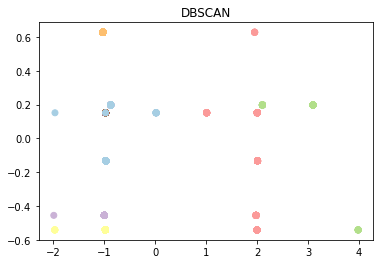

In [43]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1],c=X_principal['cluster'], cmap='Paired')
plt.title("DBSCAN")